In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Matplotlib is building the font cache; this may take a moment.


In [ ]:
import pandas as pd

url = "../data/benin-malanville.csv"  
df = pd.read_csv(url)
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
print("overview of the first 5 rows of the dataset:")
df.head()

overview of the first 5 rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
print("overview of the last 5 rows of the dataset:")
df.tail()

overview of the last 5 rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [7]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
445087,2022-06-14 02:08,-2.7,-0.2,-2.4,0.0,0.0,27.1,67.4,8.7,10.7,1.3,109.3,12.9,997,0,0.0,28.0,27.3,NaN
436289,2022-06-07 23:30,-0.9,-0.2,-0.9,0.0,0.0,27.0,67.1,3.4,4.1,0.6,244.0,11.8,996,0,0.0,27.3,26.6,NaN
310375,2022-03-12 12:56,672.9,41.7,623.5,650.1,618.1,36.0,20.7,2.0,2.9,0.6,79.4,13.2,992,0,0.0,58.4,47.5,NaN
302290,2022-03-06 22:11,-6.7,-0.6,-8.6,0.0,0.0,27.8,30.2,1.8,2.1,0.3,199.3,8.5,991,0,0.0,26.6,25.8,NaN
362531,2022-04-17 18:12,84.9,30.1,77.8,68.0,67.2,38.5,10.8,4.9,6.9,1.1,337.7,11.9,988,0,0.0,39.3,38.8,NaN


In [8]:
print("An overview of the dataset: the shape of the dataset")
print(df.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [9]:
print("Check for missing values in the dataset:")
print(df.isna().sum())

Check for missing values in the dataset:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [11]:
print("making sure comments column is entirely empty")
df['Comments'].notna().sum()


making sure comments column is entirely empty


np.int64(0)

In [12]:
df=df.drop(columns=['Comments'])

In [13]:
print("checking if the comments column is dropped")
df.info()

checking if the comments column is dropped
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null 

In [14]:
print("description of the numeric columns in the dataset:")
df.describe()

description of the numeric columns in the dataset:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


In [15]:
print("The description of the categorical columns in the dataset:")
df.describe(include=['object'])

The description of the categorical columns in the dataset:


,Timestamp
count,525600
unique,525600
top,2021-08-09 00:01
freq,1


In [16]:
print("The description of all columns in the dataset:")
df.describe(include="all")

The description of all columns in the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
unique,525600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-08-09 00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,NaN,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,NaN,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,NaN,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,NaN,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000


In [17]:
# Exact Duplicate rows
dup_count=df.duplicated().sum()
print(f"Number of exact duplicate rows in the dataset: {dup_count}")

Number of exact duplicate rows in the dataset: 0


In [18]:
# Catagorical cadinals
cat_cols=df.select_dtypes(include=["object","category"]).columns.tolist()
cardinality= {c:df[c].nunique()for c in cat_cols}
print("Cardinality(catagoricals):", cardinality)

Cardinality(catagoricals): {'Timestamp': 525600}


Outlier Detection & Basic Cleaning

In [21]:
# Z-score Outlier detection
num_cols=df.select_dtypes(include=[np.number]).columns.tolist()
z=np.abs(stats.zscore(df[num_cols],nan_policy='omit'))
z_outliers_mask=(z>3).any(axis=1)
print("Z-score outlier rows:",int(z_outliers_mask.sum()))

Z-score outlier rows: 17843


In [25]:
# Replace outliers with median
for col in num_cols:
     col_z=np.abs(stats.zscore(df[col],nan_policy='omit'))
     df.loc[col_z>3,col]=np.nan

for col in num_cols:
     df[col]=df[col].fillna(df[col].median())

find obvious incorrect entries

In [26]:
'''Irradiance (GHI, DNI, DHI) can’t be negative.

Module sensors (ModA, ModB) usually shouldn’t be negative (if they’re irradiance or power). If they’re temperatures, negative could be valid

Wind speed (WS, WSgust) can’t be negative.

Often WSgust >= WS. If WSgust < WS, that’s suspicious.'''

def set_negetives_to_nan(df,cols):
    for c in cols:
        if c in df.columns:
            df.loc[df[c]<0,c]=np.nan

key_cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]

# No negatives for irradiance and wind speeds
set_negetives_to_nan(df,[c for c in key_cols if c in df.columns])

# If ModA/ModB are irradiance-like, also block negatives
set_negetives_to_nan(df, [c for c in ["ModA","ModB"] if c in df.columns])

# if gust < ws, mark gust as NaN (suspicious)
if "WSgust" in df.columns and "WS" in df.columns:
    df.loc[df["WSgust"] < df["WS"], "WSgust"] = np.nan

Inspect Incorrect values

In [27]:
df_missing = df[key_cols].isna().sum().sort_values(ascending=False)
print("Missing per key column:\n", df_missing)
print("\nTotal missing in the entire data frame:", df.isna().any(axis=1).sum(),'rows')

Missing per key column:
 DNI       275987
DHI       259182
GHI       258847
WSgust       761
ModA           0
ModB           0
WS             0
dtype: int64

Total missing in the entire data frame: 279239 rows


In [28]:
df.describe()
df.head(20)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,NaN,NaN,NaN,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998.0,0.0,0.0,26.3,26.2
1,2021-08-09 00:02,NaN,NaN,NaN,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998.0,0.0,0.0,26.3,26.2
2,2021-08-09 00:03,NaN,NaN,NaN,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997.0,0.0,0.0,26.4,26.2
3,2021-08-09 00:04,NaN,NaN,NaN,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997.0,0.0,0.0,26.4,26.3
4,2021-08-09 00:05,NaN,NaN,NaN,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997.0,0.0,0.0,26.4,26.3
5,2021-08-09 00:06,NaN,NaN,NaN,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997.0,0.0,0.0,26.4,26.3
6,2021-08-09 00:07,NaN,NaN,NaN,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997.0,0.0,0.0,26.5,26.3
7,2021-08-09 00:08,NaN,NaN,NaN,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997.0,0.0,0.0,26.5,26.3
8,2021-08-09 00:09,NaN,NaN,NaN,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997.0,0.0,0.0,26.5,26.4
9,2021-08-09 00:10,NaN,NaN,NaN,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997.0,0.0,0.0,26.5,26.4


In [29]:
irr_cols = ["GHI", "DNI", "DHI"]

for col in irr_cols:
    df[col] = df[col].fillna(0)

In [30]:
day_mask = df['GHI'] > 5

In [31]:
from scipy import stats
import numpy as np

day_data = df.loc[day_mask, irr_cols]   # Only daytime

z = np.abs(stats.zscore(day_data, nan_policy='omit'))

# Outlier mask for daytime only
day_outliers = (z > 3).any(axis=1)

print("True daytime outliers:", day_outliers.sum())


True daytime outliers: 0


In [32]:
df[irr_cols].isna().sum()


GHI    0
DNI    0
DHI    0
dtype: int64

In [33]:
df.isna().sum()


Timestamp          0
GHI                0
DNI                0
DHI                0
ModA               0
ModB               0
Tamb               0
RH                 0
WS                 0
WSgust           761
WSstdev            0
WD                 0
WDstdev            0
BP                 0
Cleaning           0
Precipitation      0
TModA              0
TModB              0
dtype: int64

In [34]:
df['WSgust'] = df['WSgust'].fillna(df['WSgust'].median())


In [35]:
invalid_gust = (df['WSgust'] < df['WS']).sum()
print("Where gust < wind:", invalid_gust)


Where gust < wind: 761


In [36]:
df.loc[df['WSgust'] < df['WS'], 'WSgust'] = df['WS']


In [37]:
df.isna().sum()


Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [39]:
df.to_csv("../data/benin_clean.csv", index=False)

In [40]:
# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index
df = df.set_index('Timestamp')

Monthly Average Irradiance

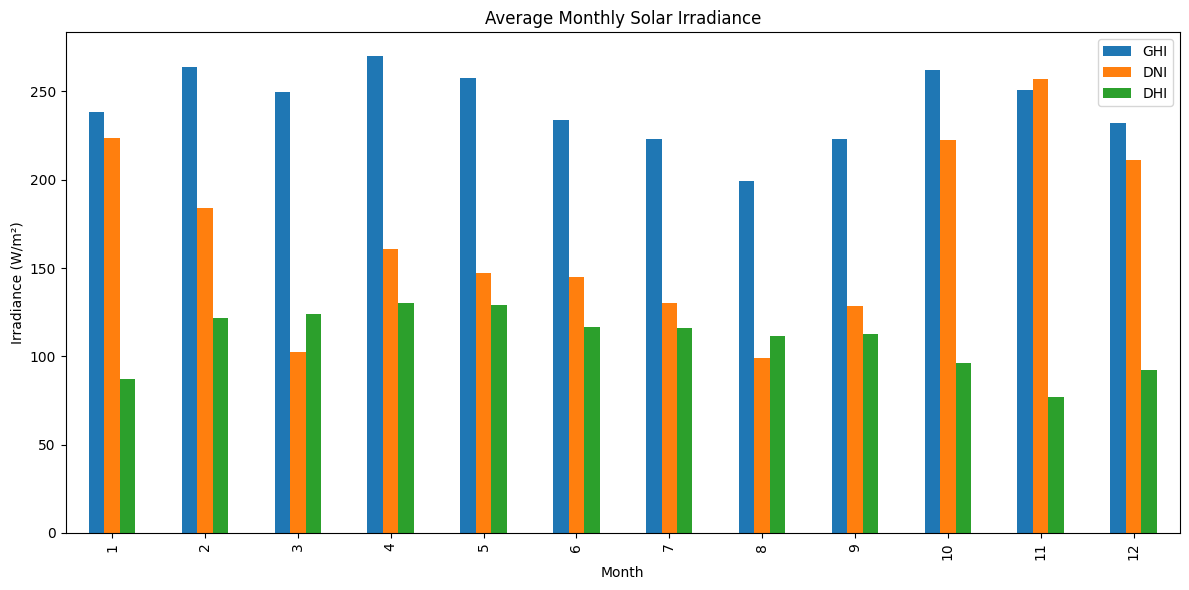

In [42]:
import matplotlib.pyplot as plt

# Add month column
df['month'] = df.index.month

# Group by month
monthly_irr = df.groupby('month')[['GHI', 'DNI', 'DHI']].mean()

# Plot
monthly_irr.plot(kind='bar', figsize=(12,6))
plt.title("Average Monthly Solar Irradiance")
plt.xlabel("Month")
plt.ylabel("Irradiance (W/m²)")
plt.tight_layout()
plt.show()


Monthly Average Temperature (Tamb)

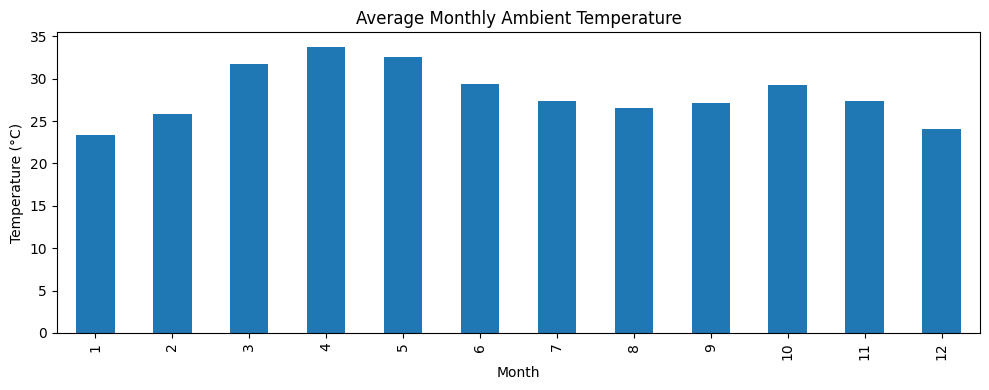

In [43]:
df.groupby('month')['Tamb'].mean().plot(
    kind='bar', figsize=(10,4)
)
plt.title("Average Monthly Ambient Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()


Average Daily Irradiance Pattern

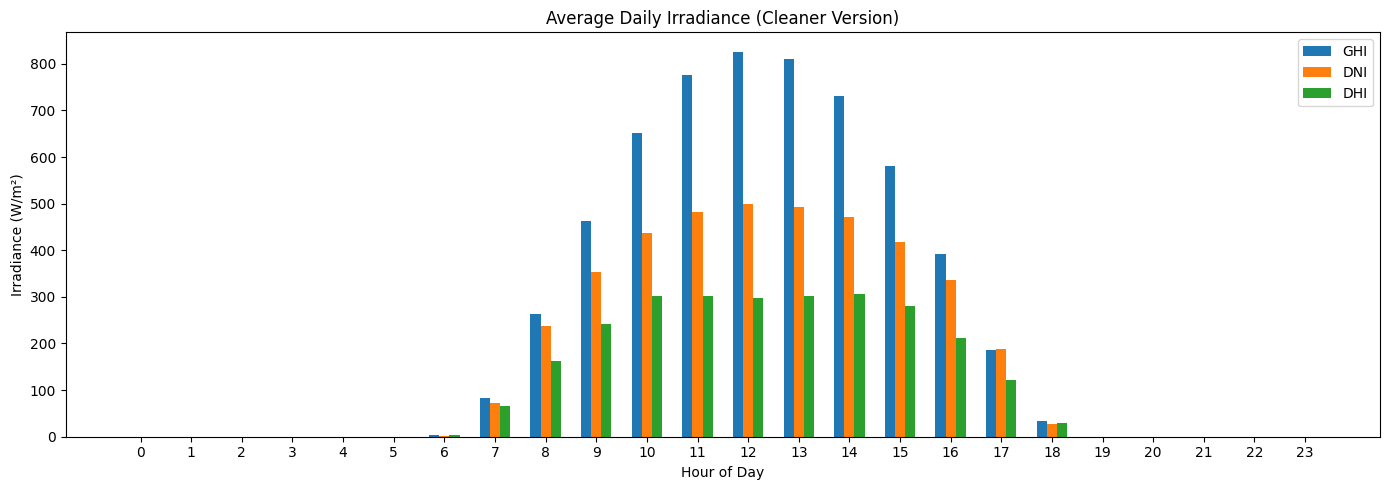

In [ ]:
import matplotlib.pyplot as plt

df['hour'] = df.index.hour
hourly_irr = df.groupby('hour')[['GHI', 'DNI', 'DHI']].mean()

plt.figure(figsize=(14,5))

plt.bar(hourly_irr.index - 0.2, hourly_irr['GHI'], width=0.2, label='GHI')
plt.bar(hourly_irr.index, hourly_irr['DNI'], width=0.2, label='DNI')
plt.bar(hourly_irr.index + 0.2, hourly_irr['DHI'], width=0.2, label='DHI')

plt.title("Average Daily Irradiance (Cleaner Version)")
plt.xlabel("Hour of Day")
plt.ylabel("Irradiance (W/m²)")
plt.xticks(range(0,24))
plt.legend()
plt.tight_layout()
plt.show()



daily average temperature 

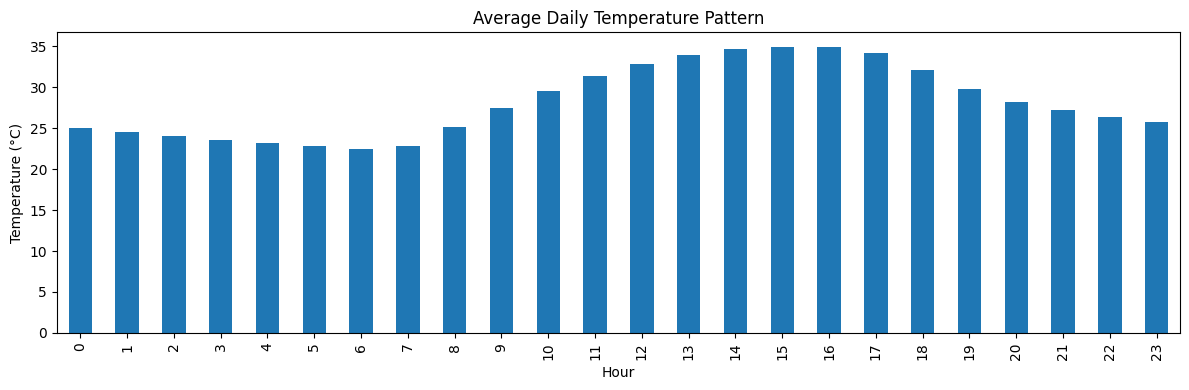

In [46]:
df.groupby('hour')['Tamb'].mean().plot(
    kind='bar', figsize=(12,4)
)
plt.title("Average Daily Temperature Pattern")
plt.xlabel("Hour")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()


Cleaning Impact

In [51]:
# Group by Cleaning flag and calculate mean for ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_impact)


                ModA       ModB
Cleaning                       
0.0       236.524528  228.73716


In [52]:
print(df['Cleaning'].value_counts())


Cleaning
0.0    525600
Name: count, dtype: int64


In [53]:
pre_clean_avg = df[['ModA', 'ModB']].mean()
print("Pre-cleaning averages:\n", pre_clean_avg)


Pre-cleaning averages:
 ModA    236.524528
ModB    228.737160
dtype: float64


In [54]:

df_cleaned = pd.read_csv("../data/benin_clean.csv")  
print(df_cleaned.head())
print(df_cleaned['Cleaning'].value_counts())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998.0       0.0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998.0       0.0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997.0       0.0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997.0       0.0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997.0       0.0            0.0   26.4   26.3  
Cleaning
0.0    525600
Name: count, dtype: int64


In [55]:
cleaning_impact = df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_impact)

                ModA       ModB
Cleaning                       
0.0       236.524528  228.73716


Correlation and Relationship analysis

In [57]:
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df[cols].corr()
print(corr_matrix)

            GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.881436  0.816853  0.919190  0.872842
DNI    0.881436  1.000000  0.575526  0.790062  0.754970
DHI    0.816853  0.575526  1.000000  0.795758  0.759387
TModA  0.919190  0.790062  0.795758  1.000000  0.982445
TModB  0.872842  0.754970  0.759387  0.982445  1.000000


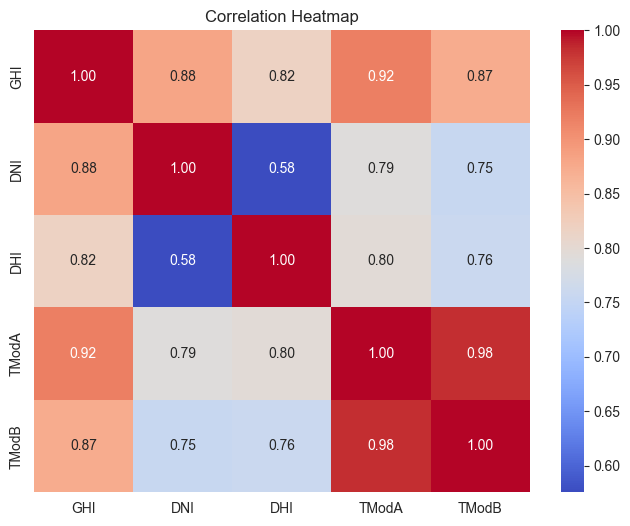

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


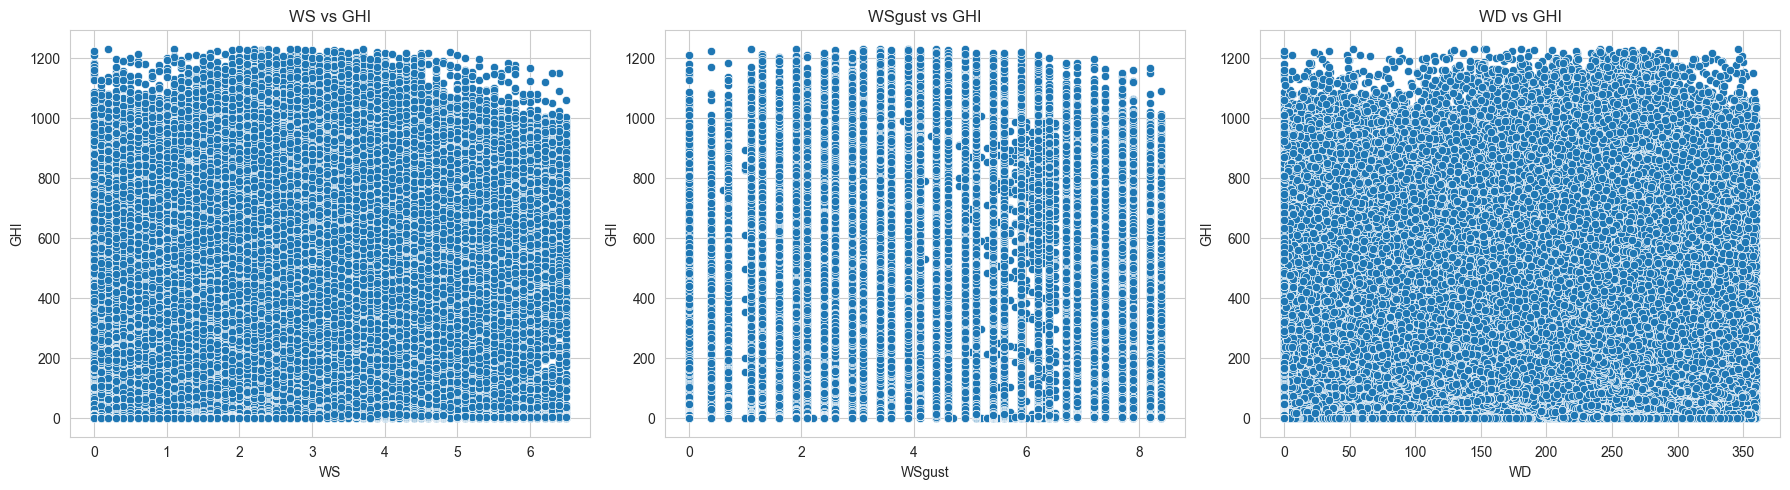

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(x='WS', y='GHI', data=df, ax=axes[0])
axes[0].set_title("WS vs GHI")

sns.scatterplot(x='WSgust', y='GHI', data=df, ax=axes[1])
axes[1].set_title("WSgust vs GHI")

sns.scatterplot(x='WD', y='GHI', data=df, ax=axes[2])
axes[2].set_title("WD vs GHI")

plt.tight_layout()
plt.show()


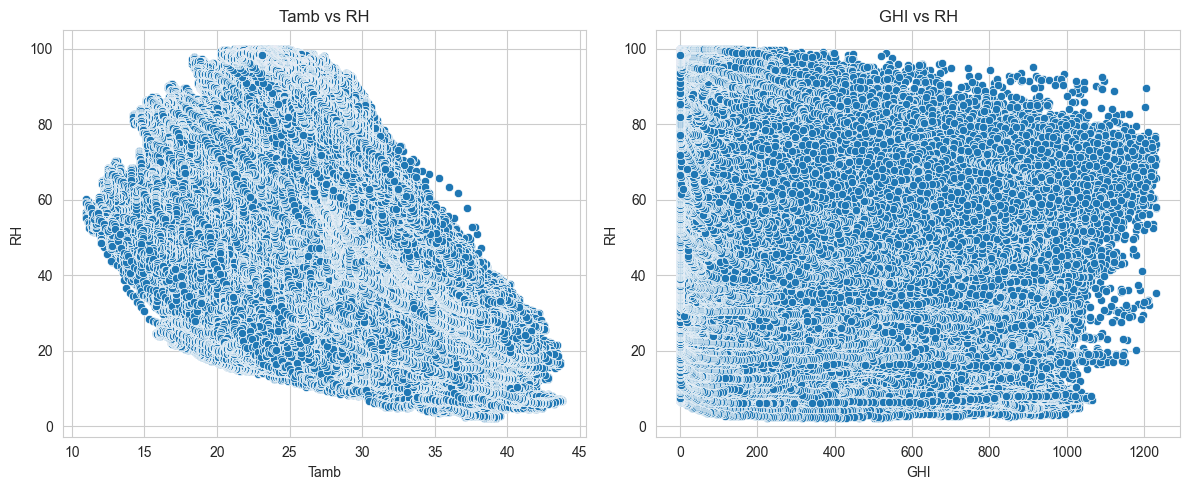

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x='Tamb', y='RH', data=df, ax=axes[0])
axes[0].set_title("Tamb vs RH")

sns.scatterplot(x='GHI', y='RH', data=df, ax=axes[1])
axes[1].set_title("GHI vs RH")

plt.tight_layout()
plt.show()


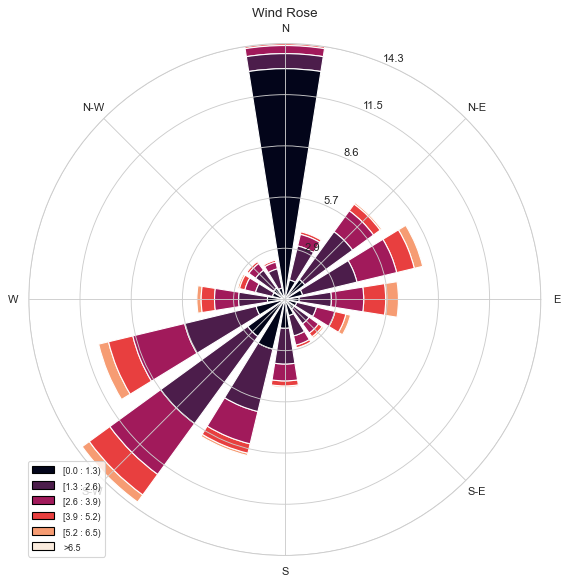

In [61]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose")
plt.show()


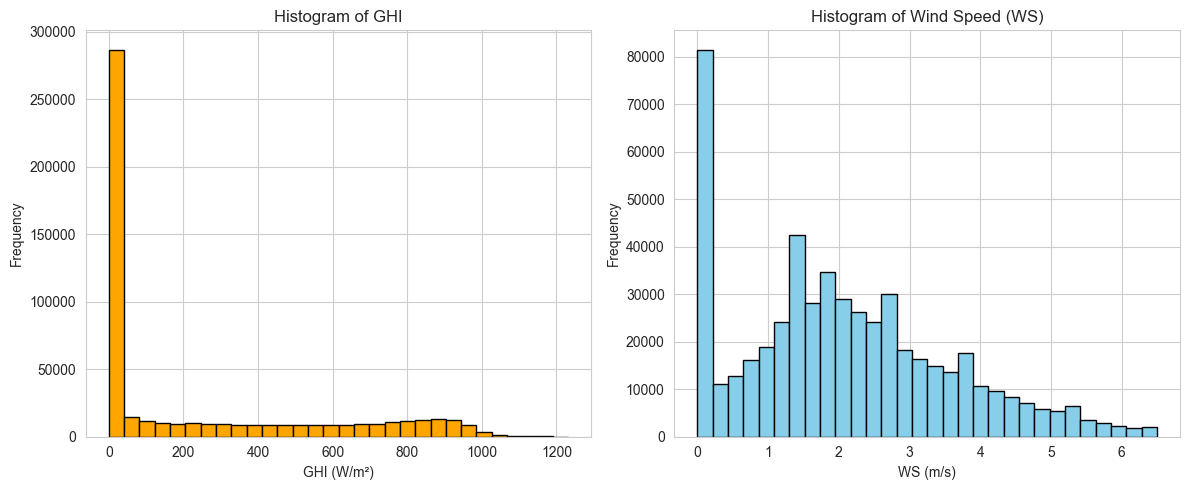

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Histogram of GHI
axes[0].hist(df['GHI'].dropna(), bins=30, color='orange', edgecolor='black')
axes[0].set_title("Histogram of GHI")
axes[0].set_xlabel("GHI (W/m²)")
axes[0].set_ylabel("Frequency")

# Histogram of WS
axes[1].hist(df['WS'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[1].set_title("Histogram of Wind Speed (WS)")
axes[1].set_xlabel("WS (m/s)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
